In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

import numpy as np
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
import matplotlib.pylab as plt

Using TensorFlow backend.


In [2]:
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

In [3]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


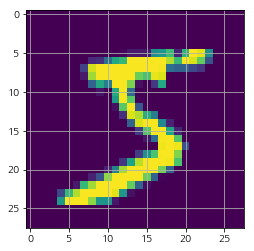

In [7]:
plt.imshow(X_train0[0])
plt.grid(True)
plt.show()

In [13]:
X_train0[0].shape, 28*28

((28, 28), 784)

In [11]:
X_train0[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train = X_train0.reshape(60000, 784).astype('float32')/255.0
X_test = X_test0.reshape(10000, 784).astype('float32')/255.0
print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)

(60000, 784) float32
(10000, 784) float32


In [15]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [11]:
np.random.seed(0)

model = Sequential()
model.add(Dense(50, input_dim=784, activation="relu"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

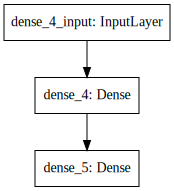

In [19]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [20]:
model.layers

In [21]:
l1 = model.layers[0]
l2 = model.layers[1]

In [22]:
l1.name

'dense_4'

In [23]:
l1.input_shape

(None, 784)

In [24]:
l1.output_shape

(None, 50)

In [25]:
l1.activation

<function keras.activations.relu>

In [26]:
l2.name

'dense_5'

In [27]:
l2.input_shape

(None, 50)

In [28]:
l2.output_shape

(None, 10)

In [29]:
l2.activation

<function keras.activations.sigmoid>

In [12]:
%%time
hist = model.fit(X_train, Y_train, nb_epoch=100, batch_size=30, validation_data=(X_test, Y_test), verbose=2)

C:\Users\a\AppData\Local\Programs\Python\Python35\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
4s - loss: 0.0422 - acc: 0.7848 - val_loss: 0.0242 - val_acc: 0.8884
Epoch 2/100
2s - loss: 0.0221 - acc: 0.8889 - val_loss: 0.0189 - val_acc: 0.9068
Epoch 3/100
2s - loss: 0.0186 - acc: 0.9030 - val_loss: 0.0165 - val_acc: 0.9150
Epoch 4/100
2s - loss: 0.0166 - acc: 0.9111 - val_loss: 0.0149 - val_acc: 0.9231
Epoch 5/100
3s - loss: 0.0151 - acc: 0.9194 - val_loss: 0.0138 - val_acc: 0.9279
Epoch 6/100
2s - loss: 0.0140 - acc: 0.9254 - val_loss: 0.0129 - val_acc: 0.9311
Epoch 7/100
2s - loss: 0.0131 - acc: 0.9299 - val_loss: 0.0122 - val_acc: 0.9357
Epoch 8/100
2s - loss: 0.0124 - acc: 0.9339 - val_loss: 0.0116 - val_acc: 0.9370
Epoch 9/100
3s - loss: 0.0117 - acc: 0.9371 - val_loss: 0.0111 - val_acc: 0.9400
Epoch 10/100
3s - loss: 0.0112 - acc: 0.9399 - val_loss: 0.0107 - val_acc: 0.9427
Epoch 11/100
3s - loss: 0.0107 - acc: 0.9424 - val_loss: 0.0103 - val_acc: 0.9441
Epoch 12/100
2s - loss: 0.0103 - acc: 0.9450 - val_loss: 

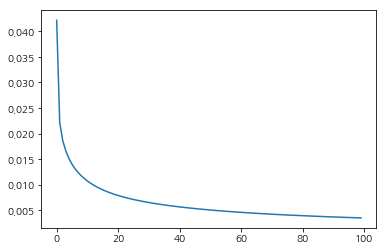

In [13]:
plt.plot(hist.history['loss'])
plt.show()

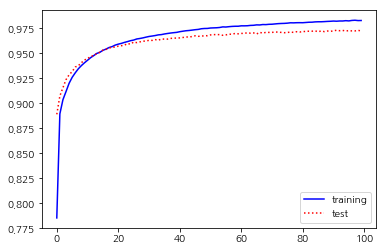

In [14]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [15]:
model.save_weights("my_model.h5")

In [16]:
model.save('my_model2.h5')